In [5]:
##pd.series(data)
##series creations
import pandas as pd
data = [10,20,30,40]
v = pd.Series(data)
v

0    10
1    20
2    30
3    40
dtype: int64

In [6]:
data = {
  'Name': ['Alice', 'Bob', 'Charlie'],
 'Age': [25, 30, 35],
 'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)
print(df)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


In [9]:
df = pd.read_csv("transactions.csv");
df.head(2)


,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1


In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    10 non-null     int64  
 1   TransactionDate  10 non-null     object 
 2   UserID           9 non-null      float64
 3   ProductID        10 non-null     int64  
 4   Quantity         10 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


,TransactionID,UserID,ProductID,Quantity
count,10.00000,9.000000,10.000000,10.000000
mean,5.50000,3.444444,3.400000,2.400000
std,3.02765,2.127858,1.074968,1.712698
min,1.00000,1.000000,2.000000,1.000000
25%,3.25000,2.000000,2.250000,1.000000
50%,5.50000,3.000000,4.000000,2.000000
75%,7.75000,3.000000,4.000000,3.000000
max,10.00000,7.000000,5.000000,6.000000


In [25]:
df.isna().sum()
  df.isnull().sum()

TransactionID      0
TransactionDate    0
UserID             1
ProductID          0
Quantity           0
dtype: int64

In [32]:
df['ProductID'] #accesing the single column
# df['UserID'].isnull().sum() 

0    2
1    4
2    3
3    2
4    4
5    5
6    4
7    2
8    4
9    4
Name: ProductID, dtype: int64

In [33]:
#accesing thee cols
df[['Quantity','UserID']] #accensing the multiple columns

,Quantity,UserID
0,1,7.0
1,1,3.0
2,1,3.0
3,3,1.0
4,1,2.0
5,6,2.0
6,1,3.0
7,3,NaN
8,3,7.0
9,4,3.0


In [42]:
#accessing the rows
display(df.iloc[0]) #single row
df.iloc[[1,2]] #multiple row

TransactionID               1
TransactionDate    2010-08-21
UserID                    7.0
ProductID                   2
Quantity                    1
Name: 0, dtype: object

,TransactionID,TransactionDate,UserID,ProductID,Quantity
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1


In [56]:
#filtering the data
filtered_data_without_nonull_value = df[df['UserID'].notnull()]
filtered_data_with_null = df[df['UserID'].isnull()]
filtered_data = df[df['UserID'] >6]
filtered_data

,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
8,9,2015-04-24,7.0,4,3


In [144]:
df_copy = df.copy()
# df 
## while updating there is an attribute called the inplace = true modify the correct objects
df_copy = df_copy.rename(columns={'UserID':'uid'})
df_copy
import math
df_copy.fillna(int((df['UserID'].mean())))

,TransactionID,TransactionDate,uid,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1
5,6,2013-12-23,2.0,5,6
6,7,2013-12-30,3.0,4,1
7,8,2014-04-24,3.0,2,3
8,9,2015-04-24,7.0,4,3
9,10,2016-05-08,3.0,4,4


In [88]:
#dropping the rows
display(df_copy.dropna())
df_copy

,TransactionID,TransactionDate,uid,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1
5,6,2013-12-23,2.0,5,6
6,7,2013-12-30,3.0,4,1
8,9,2015-04-24,7.0,4,3
9,10,2016-05-08,3.0,4,4


,TransactionID,TransactionDate,uid,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1
5,6,2013-12-23,2.0,5,6
6,7,2013-12-30,3.0,4,1
7,8,2014-04-24,NaN,2,3
8,9,2015-04-24,7.0,4,3
9,10,2016-05-08,3.0,4,4


In [92]:
df.sort_values(by=['UserID','TransactionID'],ascending=[True,False])

,TransactionID,TransactionDate,UserID,ProductID,Quantity
3,4,2012-08-26,1.0,2,3
5,6,2013-12-23,2.0,5,6
4,5,2013-06-06,2.0,4,1
9,10,2016-05-08,3.0,4,4
6,7,2013-12-30,3.0,4,1
2,3,2011-06-16,3.0,3,1
1,2,2011-05-26,3.0,4,1
8,9,2015-04-24,7.0,4,3
0,1,2010-08-21,7.0,2,1
7,8,2014-04-24,NaN,2,3


In [117]:
# subset rows concept
foo = [False,True]*5
df[foo]


,TransactionID,TransactionDate,UserID,ProductID,Quantity
1,2,2011-05-26,3.0,4,1
3,4,2012-08-26,1.0,2,3
5,6,2013-12-23,2.0,5,6
7,8,2014-04-24,NaN,2,3
9,10,2016-05-08,3.0,4,4


In [128]:
df[df['Quantity'] > 1]['TransactionID'] #variation one
df[df['Quantity'] > 1][['TransactionID','TransactionDate']] #variation two

,TransactionID,TransactionDate
3,4,2012-08-26
5,6,2013-12-23
7,8,2014-04-24
8,9,2015-04-24
9,10,2016-05-08


In [129]:
#iloc for the cols and df[['col1',''col2]] for the the 

In [141]:
columns_to_exclude = ['Quantity','TransactionDate']
# subset_columns_excluded = df[[col for col in df.columns if col not in columns_to_exclude]]
subset_columns_excluded = df[[col for col in df.columns if col not in columns_to_exclude]]
print(subset_columns_excluded)
# df


   TransactionID  UserID  ProductID
0              1     7.0          2
1              2     3.0          4
2              3     3.0          3
3              4     1.0          2
4              5     2.0          4
5              6     2.0          5
6              7     3.0          4
7              8     NaN          2
8              9     7.0          4
9             10     3.0          4


In [145]:
print(df_copy.dtypes)
df_copy['TransactionDate'] = pd.to_datetime(df_copy['TransactionDate'])
print(df_copy.dtypes)

TransactionID        int64
TransactionDate     object
uid                float64
ProductID            int64
Quantity             int64
dtype: object
TransactionID               int64
TransactionDate    datetime64[ns]
uid                       float64
ProductID                   int64
Quantity                    int64
dtype: object


In [151]:
#inserting the new column
df_copy['foo'] = df['ProductID']+df['UserID']
df_copy

,TransactionID,TransactionDate,uid,ProductID,Quantity,foo
0,1,2010-08-21,7.0,2,1,9.0
1,2,2011-05-26,3.0,4,1,7.0
2,3,2011-06-16,3.0,3,1,6.0
3,4,2012-08-26,1.0,2,3,3.0
4,5,2013-06-06,2.0,4,1,6.0
5,6,2013-12-23,2.0,5,6,7.0
6,7,2013-12-30,3.0,4,1,7.0
7,8,2014-04-24,NaN,2,3,NaN
8,9,2015-04-24,7.0,4,3,11.0
9,10,2016-05-08,3.0,4,4,7.0


In [161]:
#inseerting the new row or tuple
# df_copy.iloc[len(df)] = [1,2,'025-02-02',8,1,0]
# df_copy.loc[len(df_copy)] = [1, '2025-02-02', 2, 8, 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    10 non-null     int64  
 1   TransactionDate  10 non-null     object 
 2   UserID           9 non-null      float64
 3   ProductID        10 non-null     int64  
 4   Quantity         10 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


### EXERCISE QESTIONS


In [ ]:
# Print Summary of transaction data set
# df.info()
df.describe()
print(df.describe(include='all')) #summary


        TransactionID TransactionDate    UserID  ProductID   Quantity
count        10.00000              10  9.000000  10.000000  10.000000
unique            NaN              10       NaN        NaN        NaN
top               NaN      2010-08-21       NaN        NaN        NaN
freq              NaN               1       NaN        NaN        NaN
mean          5.50000             NaN  3.444444   3.400000   2.400000
std           3.02765             NaN  2.127858   1.074968   1.712698
min           1.00000             NaN  1.000000   2.000000   1.000000
25%           3.25000             NaN  2.000000   2.250000   1.000000
50%           5.50000             NaN  3.000000   4.000000   2.000000
75%           7.75000             NaN  3.000000   4.000000   3.000000
max          10.00000             NaN  7.000000   5.000000   6.000000


In [172]:
# . Print Numbers of Attributes

# print(len(df.columns))

# print(df.shape[1]) 
print(df.shape) #(row[0],col[1])

5
(10, 5)


In [174]:
# Print Numbers of Records

len(df)

print(df.shape[0])  # Number of rows (records)


10

In [185]:
#Get the row names
# print(df.index.tolist()) 
print(df.index.to_list())

<generator object <genexpr> at 0x0000021E0E98E680>


In [189]:
#Get the column names
print([col for col in df.columns])
print(df.columns.tolist())  # Get column names


['TransactionID', 'TransactionDate', 'UserID', 'ProductID', 'Quantity']
['TransactionID', 'TransactionDate', 'UserID', 'ProductID', 'Quantity']


In [190]:
# View top 10 Records
df.head(10)

,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1
5,6,2013-12-23,2.0,5,6
6,7,2013-12-30,3.0,4,1
7,8,2014-04-24,NaN,2,3
8,9,2015-04-24,7.0,4,3
9,10,2016-05-08,3.0,4,4


In [193]:
#Change the name of column “ Quantity” to “Quant”
df.rename(columns={'Quantity':'Quant'},inplace=True)
df

,TransactionID,TransactionDate,UserID,ProductID,Quant
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1
5,6,2013-12-23,2.0,5,6
6,7,2013-12-30,3.0,4,1
7,8,2014-04-24,NaN,2,3
8,9,2015-04-24,7.0,4,3
9,10,2016-05-08,3.0,4,4


In [198]:
#.Change the name of columns ProductID and UserID
df.rename(columns={'UserID':'UID','ProductID':'PID'},inplace=True)
df

,TransactionID,TransactionDate,UID,PID,Quant
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1
5,6,2013-12-23,2.0,5,6
6,7,2013-12-30,3.0,4,1
7,8,2014-04-24,NaN,2,3
8,9,2015-04-24,7.0,4,3
9,10,2016-05-08,3.0,4,4


In [200]:
#Order the rows of transactions by TransactionId descending, if ascending then ascending=True
sorted_order = df.sort_values(by=['TransactionID'],ascending=[False])
sorted_order

,TransactionID,TransactionDate,UID,PID,Quant
9,10,2016-05-08,3.0,4,4
8,9,2015-04-24,7.0,4,3
7,8,2014-04-24,NaN,2,3
6,7,2013-12-30,3.0,4,1
5,6,2013-12-23,2.0,5,6
4,5,2013-06-06,2.0,4,1
3,4,2012-08-26,1.0,2,3
2,3,2011-06-16,3.0,3,1
1,2,2011-05-26,3.0,4,1
0,1,2010-08-21,7.0,2,1


In [207]:
order_rows_by_qty = df.sort_values(by=['Quant','TransactionDate'],ascending=[True,False])
df

,TransactionID,TransactionDate,UID,PID,Quant
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1
5,6,2013-12-23,2.0,5,6
6,7,2013-12-30,3.0,4,1
7,8,2014-04-24,NaN,2,3
8,9,2015-04-24,7.0,4,3
9,10,2016-05-08,3.0,4,4


In [6]:
#11. Set the column order of Transactions as ProductID, Quantity, TransactionDate, TransactionID, UserID
import pandas as pd
df = pd.read_csv('transactions.csv')
df[['ProductID','Quantity','TransactionDate','TransactionID','UserID']]



,ProductID,Quantity,TransactionDate,TransactionID,UserID
0,2,1,2010-08-21,1,7.0
1,4,1,2011-05-26,2,3.0
2,3,1,2011-06-16,3,3.0
3,2,3,2012-08-26,4,1.0
4,4,1,2013-06-06,5,2.0
5,5,6,2013-12-23,6,2.0
6,4,1,2013-12-30,7,3.0
7,2,3,2014-04-24,8,NaN
8,4,3,2015-04-24,9,7.0
9,4,4,2016-05-08,10,3.0


In [26]:
#12 Make UserID the first column of transactions
# df = df['UserID'] + df[[col for col in df.columns col != 'UserID']]
# df_c = df['UserID'] + df['Quantity'] #connination of cols parallay

df_c= df[['UserID'] + [col for col in df.columns if col != 'UserID']]
df_c



,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
1,3.0,2,2011-05-26,4,1
2,3.0,3,2011-06-16,3,1
3,1.0,4,2012-08-26,2,3
4,2.0,5,2013-06-06,4,1
5,2.0,6,2013-12-23,5,6
6,3.0,7,2013-12-30,4,1
7,NaN,8,2014-04-24,2,3
8,7.0,9,2015-04-24,4,3
9,3.0,10,2016-05-08,4,4


In [40]:
#. Extracting arrays from a Data Frame. Get the 2nd column
# arr = df.iloc[:, 1].values  # Extract 2nd column as an array
arr = df.iloc[:,1] #all rows and columns
arr

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: TransactionID, dtype: int64

In [43]:
#14 Get the ProductID Array
# product_id_array = df['ProductID'].unique()
product_id_array = df['ProductID'].values
product_id_array

array([2, 4, 3, 2, 4, 5, 4, 2, 4, 4], dtype=int64)

In [44]:
# Row subsetting, subset rows 1,3 and 6
df.iloc[[1,3,6]]

,UserID,TransactionID,TransactionDate,ProductID,Quantity
1,3.0,2,2011-05-26,4,1
3,1.0,4,2012-08-26,2,3
6,3.0,7,2013-12-30,4,1


In [51]:
# subset rows excluding 1,3 and 6
exclude_rows = [1,3,6]
df.iloc[[idx for idx in range(len(df)) if idx not in exclude_rows]]
# df_filtered = df.iloc[[idx for idx in range(len(df)) if idx not in exclude_rows]]
df_filtered


,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
2,3.0,3,2011-06-16,3,1
4,2.0,5,2013-06-06,4,1
5,2.0,6,2013-12-23,5,6
7,NaN,8,2014-04-24,2,3
8,7.0,9,2015-04-24,4,3
9,3.0,10,2016-05-08,4,4


In [58]:
# 18. Subset the first three rows
# df.iloc[[1,2,3]]
df_subset = df.iloc[:3]
df_subset

,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
1,3.0,2,2011-05-26,4,1
2,3.0,3,2011-06-16,3,1


In [59]:
df.iloc[:3,2] #df.iloc[start_row:end_row,[columns]]


0    2010-08-21
1    2011-05-26
2    2011-06-16
Name: TransactionDate, dtype: object

In [61]:
# . Subset rows excluding the last 2 rows
df_subset = df.iloc[:-2]
df_subset

,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
1,3.0,2,2011-05-26,4,1
2,3.0,3,2011-06-16,3,1
3,1.0,4,2012-08-26,2,3
4,2.0,5,2013-06-06,4,1
5,2.0,6,2013-12-23,5,6
6,3.0,7,2013-12-30,4,1
7,NaN,8,2014-04-24,2,3


In [62]:
#Subset rows excluding the first 3 rows
df.iloc[3:]


,UserID,TransactionID,TransactionDate,ProductID,Quantity
3,1.0,4,2012-08-26,2,3
4,2.0,5,2013-06-06,4,1
5,2.0,6,2013-12-23,5,6
6,3.0,7,2013-12-30,4,1
7,NaN,8,2014-04-24,2,3
8,7.0,9,2015-04-24,4,3
9,3.0,10,2016-05-08,4,4


In [63]:
#. Subset rows where Quantity>1
df_quality_subset = df[df['Quantity'] >1]
df_quality_subset

,UserID,TransactionID,TransactionDate,ProductID,Quantity
3,1.0,4,2012-08-26,2,3
5,2.0,6,2013-12-23,5,6
7,NaN,8,2014-04-24,2,3
8,7.0,9,2015-04-24,4,3
9,3.0,10,2016-05-08,4,4


In [69]:
# Subset rows where UserID=2
df[df['UserID'] == 2]

,UserID,TransactionID,TransactionDate,ProductID,Quantity
4,2.0,5,2013-06-06,4,1
5,2.0,6,2013-12-23,5,6


In [80]:
# Subset rows where Quantity>1 and UserID=2
df[(df['Quantity'] > 1) & (df['UserID'] == 2)]
# df[(df['Quantity'] > 1) & (df['UserID'] == 2)]


,UserID,TransactionID,TransactionDate,ProductID,Quantity
5,2.0,6,2013-12-23,5,6


In [ ]:
# 25. Subset rows where Quantity + UserID is >3
# df[ (df['Quantity'] != 0) + (df['UserID'] > 3) ]
df[(df['Quantity'] + df['UserID']) > 3]


,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
1,3.0,2,2011-05-26,4,1
2,3.0,3,2011-06-16,3,1
3,1.0,4,2012-08-26,2,3
4,2.0,5,2013-06-06,4,1
5,2.0,6,2013-12-23,5,6
6,3.0,7,2013-12-30,4,1
7,NaN,8,2014-04-24,2,3
8,7.0,9,2015-04-24,4,3
9,3.0,10,2016-05-08,4,4


In [90]:
# 26. Subset rows where an external array, foo, is True
foo = [True,False]*(len(df)//2)
df_subset = df[foo]
df_subset

,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
2,3.0,3,2011-06-16,3,1
4,2.0,5,2013-06-06,4,1
6,3.0,7,2013-12-30,4,1
8,7.0,9,2015-04-24,4,3


In [96]:
# 27 Subset rows where an external array, bar, is positive
# df_subset = df[bar > 0]
import numpy as np
bar = np.array([1, -1, 1, 1, -1, 1, -1, 1, 1, -1]) 
df[bar > 0]



,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
2,3.0,3,2011-06-16,3,1
3,1.0,4,2012-08-26,2,3
5,2.0,6,2013-12-23,5,6
7,NaN,8,2014-04-24,2,3
8,7.0,9,2015-04-24,4,3


In [106]:
# 28. Subset rows where foo is TRUE or bar is negative
foo = np.array([True,False]*(len(df)//2))
bar = np.array([1, -1, 1, 1, -1, 1, -1, 1, 1, -1]) 
df[(foo == True) | (bar < 0)]

,UserID,TransactionID,TransactionDate,ProductID,Quantity
0,7.0,1,2010-08-21,2,1
1,3.0,2,2011-05-26,4,1
2,3.0,3,2011-06-16,3,1
4,2.0,5,2013-06-06,4,1
6,3.0,7,2013-12-30,4,1
8,7.0,9,2015-04-24,4,3
9,3.0,10,2016-05-08,4,4


In [108]:
# 29. Subset the rows where foo is not TRUE and bar is not negative
df[(foo == False) & (bar > 0 )]

,UserID,TransactionID,TransactionDate,ProductID,Quantity
3,1.0,4,2012-08-26,2,3
5,2.0,6,2013-12-23,5,6
7,NaN,8,2014-04-24,2,3


In [110]:
#30. Subset by columns 1 and 3
df.iloc[:, [1, 3]]



,TransactionID,ProductID
0,1,2
1,2,4
2,3,3
3,4,2
4,5,4
5,6,5
6,7,4
7,8,2
8,9,4
9,10,4


In [ ]:
#31. Subset by columns TransactionID and TransactionDate

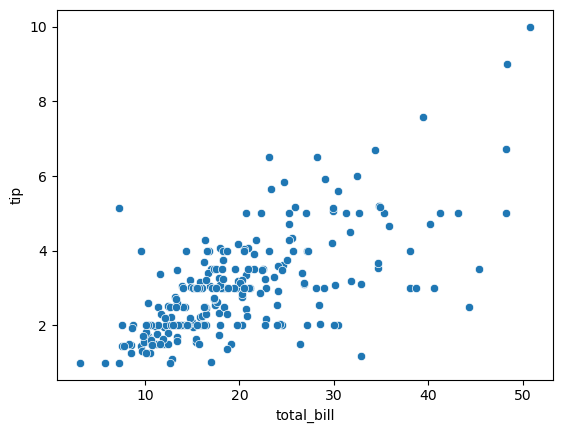

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the built-in 'tips' dataset
df = sns.load_dataset("tips")

# Create a simple scatter plot
sns.scatterplot(x="total_bill", y="tip", data=df)

# Show the plot
plt.show()
